# Hecho por Joan Sebastian Tuquerrez Gomez

Importar las librerias necesarias

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd

# Ejercicio 1, Generar numero aleatorio


*   Numero de 4 digitos, diferentes, entre 1 y 9
*   Jugador digita un numero para adivinar el generado
*   Juego de picas y fijas



##### Funcion para validar el numero ingresado por el usuario, que no se repitando los digitos,y sea entre 1 y 9

In [ ]:
def check_number():
    number = input("Ingrese un numero de 4 digitos: ")

    # Verificar si el número tiene 4 dígitos
    if len(number) != 4:
        return number, False

    # Verificar si todos los caracteres son dígitos y están entre 1 y 9
    if not all(char.isdigit() and 1 <= int(char) <= 9 for char in number):
        return number, False

    # Verificar si hay dígitos repetidos
    if len(set(number)) != len(number):
        return number, False

    return number, True

##### Funcion para calcular las picas y fijas que hayan en la comparacion del numero aleatorio y el ingresado por el usuario

In [ ]:
def calcular_picas_y_fijas(num_aleatorio, num_usuario):
    picas = 0
    fijas = 0
    for i in range(4):
        if num_usuario[i] == num_aleatorio[i]:
            fijas += 1
        elif num_usuario[i] in num_aleatorio:
            picas += 1
    return picas, fijas

In [ ]:
numRand = ''.join(map(str, np.random.choice(range(1, 10), size=4, replace=False)))

In [ ]:
intentos = 1
while True:
  while True:
    numIn, check = check_number()
    if check == True:
      break

  picas, fijas = calcular_picas_y_fijas(numRand, numIn)
  print(f"Picas: {picas} y Fijas: {fijas}")
  if fijas == 4:
    print("GANASTEEE!!!")
    break
  elif intentos == 4:
    print(f"El numero a adivinar era: {numRand}, perdiste")
    break
  else:
    intentos += 1
    print(f"Aun no adivinas, intento: {intentos}")

Ingrese un numero de 4 digitos: 4512
Picas: 1 y Fijas: 0
Aun no adivinas, intento: 2
Ingrese un numero de 4 digitos: 6893
Picas: 2 y Fijas: 1
Aun no adivinas, intento: 3
Ingrese un numero de 4 digitos: 4632
Picas: 2 y Fijas: 0
Aun no adivinas, intento: 4
Ingrese un numero de 4 digitos: 469
Ingrese un numero de 4 digitos: 4695
Picas: 3 y Fijas: 0
El numero a adivinar era: 6984, perdiste


# Ejercicio 2


1. cargar el archivo
2. Mostrar cuantas personas se recuperaron y cuantas murieron. (tanto
grafica como texto)
3. Mostrar cuantos hombres y cuantas mujeres se encuentran registrados
en el archivo. . (tanto grafica como texto)
4. Mostrar cuantos hombres murieron y cuantos sobrevivieron, cuantas
mujeres murieron y cuantas sobrevivieron. . (tanto grafica como texto)
5. Mostrar una grafica de torta (circular) que muestre los datos según el
tipo de contagio.


In [76]:
df = pd.read_csv('CovidTuluaTest.csv')
print(df)

         fecha reporte web ID de caso Fecha de notificación  \
0      2020-12-11 00:00:00  1,408,881   2020-12-10 00:00:00   
1      2020-12-11 00:00:00  1,408,882   2020-12-10 00:00:00   
2      2020-12-11 00:00:00  1,408,883   2020-12-10 00:00:00   
3      2020-12-11 00:00:00  1,408,884   2020-12-10 00:00:00   
4      2020-12-11 00:00:00  1,408,885   2020-12-10 00:00:00   
...                    ...        ...                   ...   
20509  2022-01-18 00:00:00  5,580,691   2022-01-15 00:00:00   
20510  2021-10-24 00:00:00  4,990,109   2021-10-23 00:00:00   
20511  2021-10-24 00:00:00  4,990,113   2021-10-23 00:00:00   
20512  2021-10-24 00:00:00  4,990,117   2021-10-22 00:00:00   
20513  2021-10-24 00:00:00  4,990,086   2021-10-22 00:00:00   

       Código DIVIPOLA departamento Nombre departamento  \
0                                76               VALLE   
1                                76               VALLE   
2                                76               VALLE   
3      

### **cuantas personas se recuperaron y cuantas murieron**

       Estado  Cantidad
0  Recuperado     19483
1   Fallecido       836
2         N/A         7


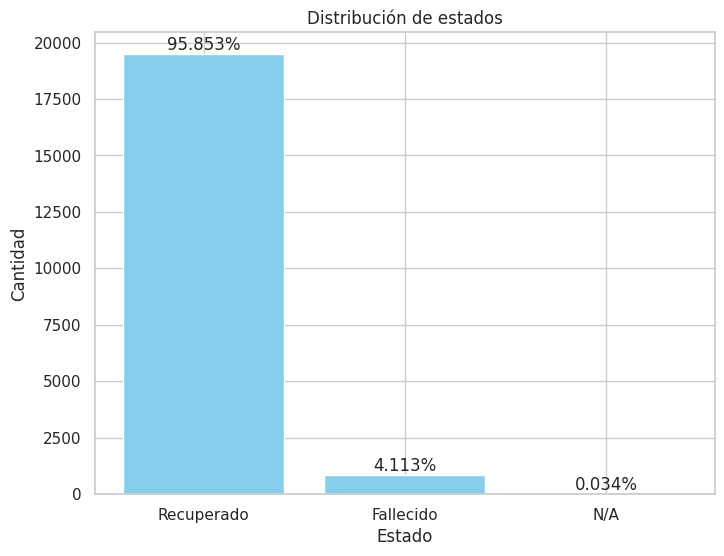

In [87]:
conteo = df['Recuperado'].value_counts().reset_index(name='conteo')
conteo.columns = ['Estado', 'Cantidad']
conteo.loc[conteo['Estado'] == 'Activo', 'Estado'] = 'N/A'
print(conteo)

# Calcular el porcentaje
total = sum(conteo['Cantidad'])
porcentajes = [(valor / total) * 100 for valor in conteo['Cantidad']]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(conteo['Estado'], conteo['Cantidad'], color='skyblue')

# Añadir etiquetas de porcentaje
for bar, porcentaje in zip(bars, porcentajes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{porcentaje:.3f}%', ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.title('Distribución de estados')

# Mostrar el gráfico
plt.show()

### **cuantos hombres y cuantas mujeres se encuentran registrados en el archivo**

    Genero  Cantidad
0  Mujeres     10987
1  Hombres      9527


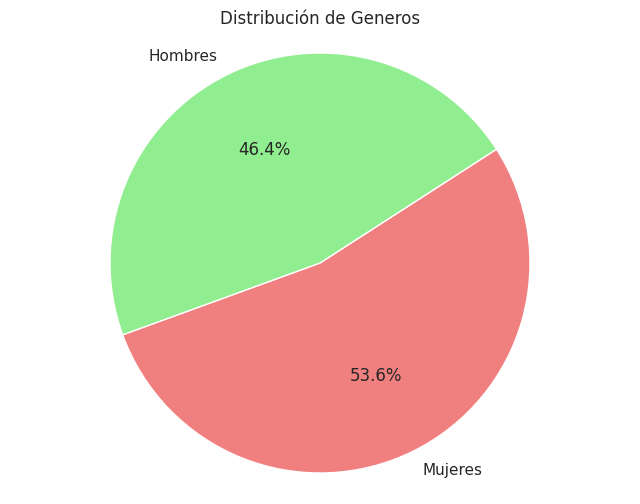

In [100]:
conteo = df['Sexo'].value_counts().reset_index(name='conteo')
conteo.columns = ['Genero', 'Cantidad']
conteo.loc[conteo['Genero'] == 'F', 'Genero'] = 'Mujeres'
conteo.loc[conteo['Genero'] == 'M', 'Genero'] = 'Hombres'
print(conteo)

# Colores para cada sector del pastel
colores = ['lightcoral', 'lightgreen']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(conteo['Cantidad'], labels=conteo['Genero'], colors=colores, autopct='%1.1f%%', startangle=200)

# Ajustar aspectos del gráfico
plt.axis('equal')  # Hace que el pastel sea un círculo en lugar de una elipse

# Agregar un título
plt.title('Distribución de Generos')

# Mostrar el gráfico
plt.show()

### **cuantos hombres murieron y cuantos sobrevivieron, cuantas mujeres murieron y cuantas sobrevivieron**

      Sexo  Recuperado  conteo
0  Mujeres      Activo       3
1  Mujeres   Fallecido     332
2  Mujeres  Recuperado   10567
3  Hombres      Activo       4
4  Hombres   Fallecido     504
5  Hombres  Recuperado    8916


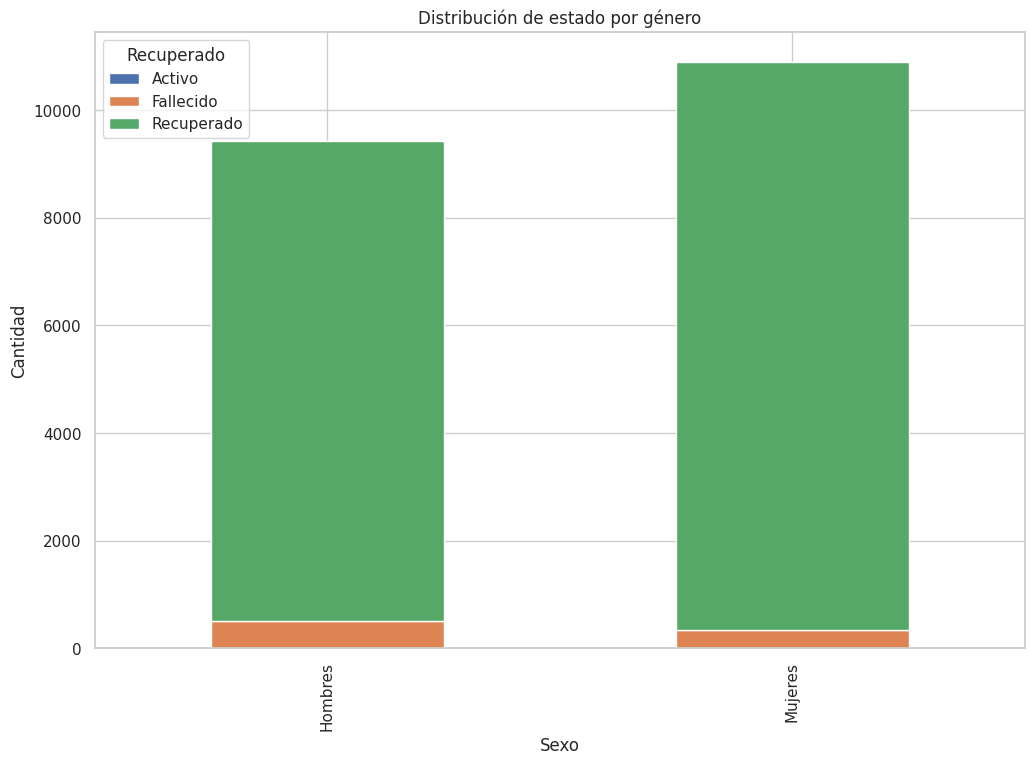

In [79]:
conteo = df.groupby(['Sexo', 'Recuperado']).size().reset_index(name='conteo')

conteo.columns = ['Sexo', 'Recuperado', 'conteo']
conteo.loc[conteo['Sexo'] == 'F', 'Sexo'] = 'Mujeres'
conteo.loc[conteo['Sexo'] == 'M', 'Sexo'] = 'Hombres'
print(conteo)

dfaux = pd.DataFrame(conteo)

# Crear un DataFrame con las agrupaciones
graf = dfaux.pivot_table(index='Sexo', columns='Recuperado', values='conteo', fill_value=0)

# Crear el gráfico de barras apiladas
graf.plot(kind='bar', stacked=True, figsize=(12, 8))

# Añadir etiquetas y título
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Distribución de estado por género')

# Mostrar el gráfico
plt.show()

### **grafica de torta (circular) que muestre los datos según el tipo de contagio**

  Tipo de Contagio  Cantidad
0      Comunitaria     17083
1      Relacionado      3405
2        Importado        26


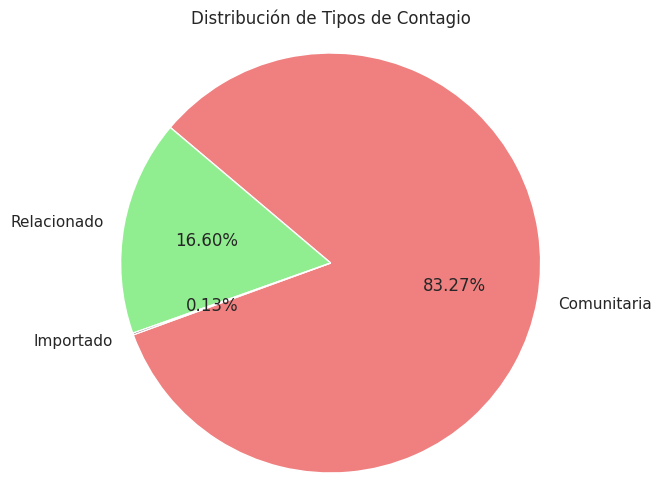

In [80]:
# Obtener los datos de conteo
conteo = df['Tipo de contagio'].value_counts().reset_index(name='Cantidad')
conteo.columns = ['Tipo de Contagio', 'Cantidad']
print(conteo)
# Colores para cada sector del pastel
colores = ['lightcoral', 'lightgreen', 'black']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(conteo['Cantidad'], labels=conteo['Tipo de Contagio'], colors=colores, autopct='%1.2f%%', startangle=200)

# Ajustar aspectos del gráfico
plt.axis('equal')  # Hace que el pastel sea un círculo en lugar de una elipse

# Agregar un título
plt.title('Distribución de Tipos de Contagio')

# Mostrar el gráfico
plt.show()

# Ejercicio 3

1. Mostrar cuantas personas se recuperaron y cuantas murieron. (tanto
grafica como texto)
2. Mostrar cuantos hombres y cuantas mujeres se encuentran registrados
en el archivo. . (tanto grafica como texto)
3. Mostrar cuantos hombres murieron y cuantos sobrevivieron, cuantas
mujeres murieron y cuantas sobrevivieron. . (tanto grafica como texto)
4. Mostrar una grafica de torta (circular) que muestre los datos según el
tipo.
5. Mostrar una grafica que permita por departamento ver el numero de
contagios, cuantos murieron, cuantos se recuperaron, cuantos hombres
y cuantas mujeres.

In [81]:
# Leer el archivo Excel
df2 = pd.read_excel('CovidNacionalTest.xlsx')

# Mostrar el contenido del DataFrame
print(df2)

        Caso  Fecha Not  Código ciudad     Departamento               Ciudad  \
0          1 2020-03-02          11001      Bogotá D.C.          Bogotá D.C.   
1          2 2020-03-06          76111  Valle del Cauca  Guadalajara de Buga   
2          3 2020-03-07           5001        Antioquia             Medellín   
3          4 2020-03-09           5001        Antioquia             Medellín   
4          5 2020-03-09           5001        Antioquia             Medellín   
...      ...        ...            ...              ...                  ...   
33349  33390 2020-06-02          23001          Córdoba             Montería   
33350  33391 2020-06-02          23001          Córdoba             Montería   
33351  33392 2020-06-02          23001          Córdoba             Montería   
33352  33393 2020-06-02          23001          Córdoba             Montería   
33353  33394 2020-05-25          23001          Córdoba             Montería   

       Edad Sexo         Tipo   Ubicaci

### cuantas personas se recuperaron y cuantas murieron

      Ubicacion  Cantidad
0          Casa     18041
1    Recuperado     12288
2      Hospital      1591
3     Fallecido      1045
4  Hospital UCI       335


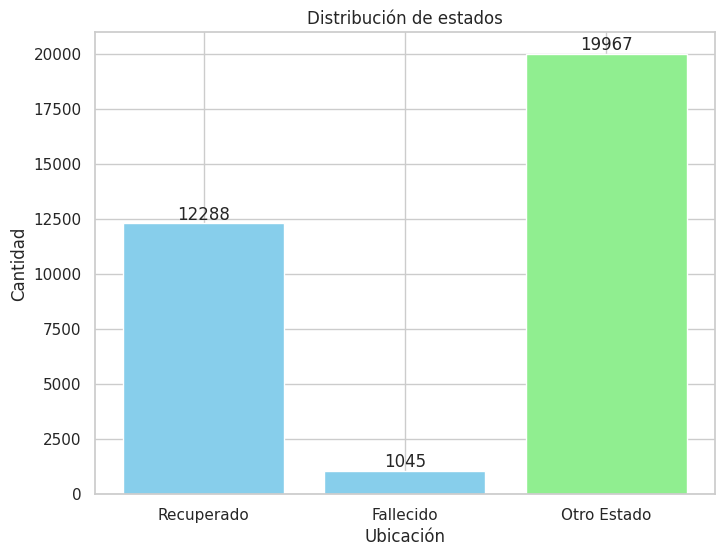

In [94]:
conteoCovid2 = df2['Ubicación'].value_counts().reset_index(name='Cantidad')
conteoCovid2.columns = ['Ubicacion', 'Cantidad']
print(conteoCovid2)

# Filtrar las ubicaciones requeridas ('Recuperado' y 'Fallecido')
ubicaciones_need = ['Recuperado', 'Fallecido']
conteo_need = conteoCovid2[conteoCovid2['Ubicacion'].isin(ubicaciones_need)]

# Calcular el total de 'Otro Estado'
otros = conteoCovid2['Cantidad'].sum() - conteo_need['Cantidad'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(conteo_need['Ubicacion'], conteo_need['Cantidad'], color='skyblue', label='Grupo 1')
plt.bar('Otro Estado', otros, color='lightgreen', label='Otro Estado')

# Agregar etiquetas de texto con las cantidades
for i, valor in enumerate(conteo_need['Cantidad']):
    plt.text(i, valor + 1, str(valor), ha='center', va='bottom')

# Agregar etiqueta de texto para la cantidad de "Otro Estado"
plt.text(len(conteo_need), otros + 1, str(otros), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Ubicación')
plt.ylabel('Cantidad')
plt.title('Distribución de estados')

# Mostrar el gráfico
plt.show()

### cuantos hombres y cuantas mujeres se encuentran registrados en el archivo

    Genero  Cantidad
0  Hombres     18465
1  Mujeres     14889


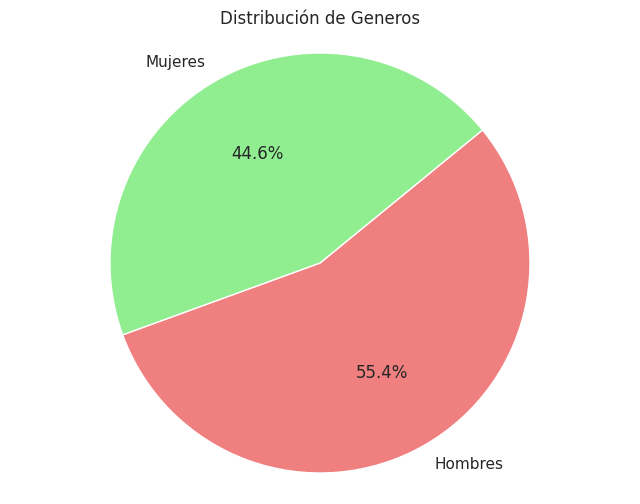

In [99]:
conteoCovid2 = df2['Sexo'].value_counts().reset_index(name='Sexo')
conteoCovid2.columns = ['Genero', 'Cantidad']
conteoCovid2.loc[conteoCovid2['Genero'] == 'F', 'Genero'] = 'Mujeres'
conteoCovid2.loc[conteoCovid2['Genero'] == 'M', 'Genero'] = 'Hombres'
print(conteoCovid2)

# Colores para cada sector del pastel
colores = ['lightcoral', 'lightgreen']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(conteoCovid2['Cantidad'], labels=conteoCovid2['Genero'], colors=colores, autopct='%1.1f%%', startangle=200)


# Ajustar aspectos del gráfico
plt.axis('equal')  # Hace que el pastel sea un círculo en lugar de una elipse

# Agregar un título
plt.title('Distribución de Generos')

# Mostrar el gráfico
plt.show()

### cuantos hombres murieron y cuantos sobrevivieron, cuantas mujeres murieron y cuantas sobrevivieron

      Sexo              aux  conteoCovid2
0  Mujeres  En recuperacion          9033
1  Mujeres        Fallecido           404
2  Mujeres       Recuperado          5452
3  Hombres  En recuperacion         10988
4  Hombres        Fallecido           641
5  Hombres       Recuperado          6836


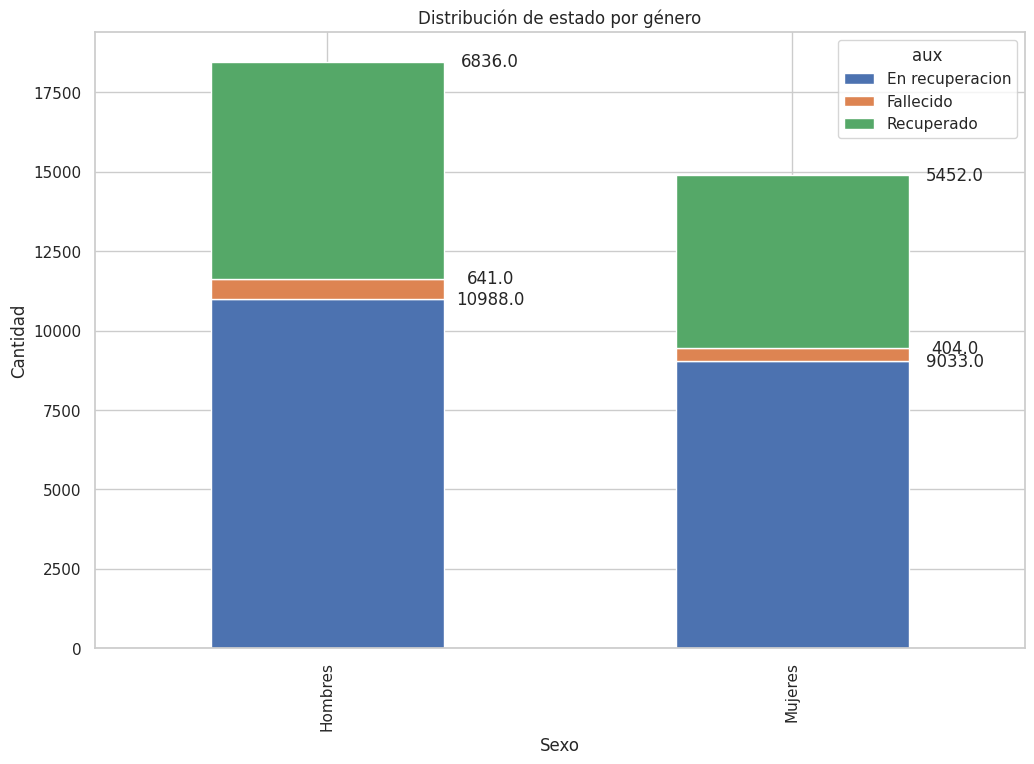

In [114]:
# Crear una lista de estados que quieres agrupar
estados_recuperacion = ['Recuperado', 'Fallecido']

# Agregar una nueva columna llamada "Estado" al DataFrame
df2['aux'] = df2['Ubicación'].apply(lambda x: x if x in estados_recuperacion else 'En recuperacion')

# Agrupar por "Sexo" y "Estado" y sumar los conteos
conteoCovid2 = df2.groupby(['Sexo', 'aux']).size().reset_index(name='conteoCovid2')

# Renombrar las categorías de sexo de 'F' y 'M' a 'Mujeres' y 'Hombres' respectivamente
conteoCovid2['Sexo'] = conteoCovid2['Sexo'].map({'F': 'Mujeres', 'M': 'Hombres'})

print(conteoCovid2)


# Crear un DataFrame con las agrupaciones
graf = conteoCovid2.pivot_table(index='Sexo', columns='aux', values='conteoCovid2', fill_value=0)

# Crear el gráfico de barras apiladas
ax = graf.plot(kind='bar', stacked=True, figsize=(12, 8))

# Añadir etiquetas y título
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Distribución de estado por género')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width + 0.1, y + height), ha='center', va='center')


# Mostrar el gráfico
plt.show()

### grafica de torta (circular) que muestre los datos según el tipo

  Tipo de Contagio  Cantidad
0       En estudio     25075
1      Relacionado      7409
2        Importado       869
3       En Estudio         1


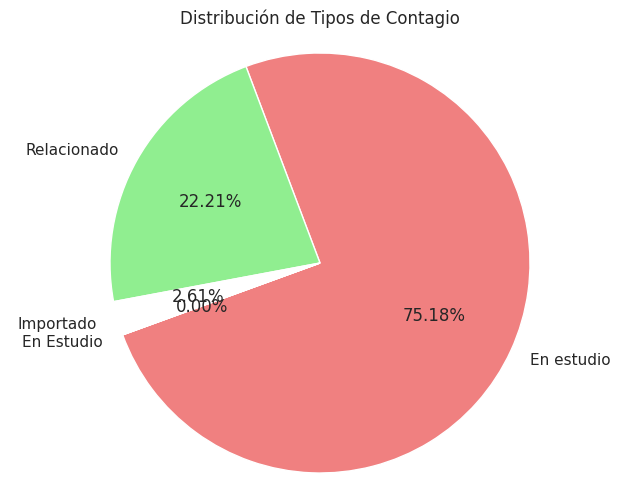

In [117]:
# Obtener los datos de conteo
conteoCovid2 = df2['Tipo'].value_counts().reset_index(name='Cantidad')
conteoCovid2.columns = ['Tipo de Contagio', 'Cantidad']
print(conteoCovid2)

# Colores para cada sector del pastel
colores = ['lightcoral', 'lightgreen', 'white']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(conteoCovid2['Cantidad'], labels=conteoCovid2['Tipo de Contagio'], colors=colores, autopct='%1.2f%%', startangle=200)

# Ajustar aspectos del gráfico
plt.axis('equal')  # Hace que el pastel sea un círculo en lugar de una elipse

# Agregar un título
plt.title('Distribución de Tipos de Contagio')

# Mostrar el gráfico
plt.show()

### grafica que permita por departamento ver el numero de contagios, cuantos murieron, cuantos se recuperaron, cuantos hombres y cuantas mujeres.

aux     Departamento Sexo  En recuperacion  Fallecido  Recuperado
0           Amazonas    F              407         18         316
1           Amazonas    M              668         47         442
2          Antioquia    F              217          3         256
3          Antioquia    M              519          3         262
4             Arauca    M                0          0           1
..               ...  ...              ...        ...         ...
65   Valle del Cauca    F              923         52         617
66   Valle del Cauca    M              989        101         629
67            Vaupés    F                3          0           0
68            Vaupés    M                8          0           0
69           Vichada    M                1          0           0

[70 rows x 5 columns]


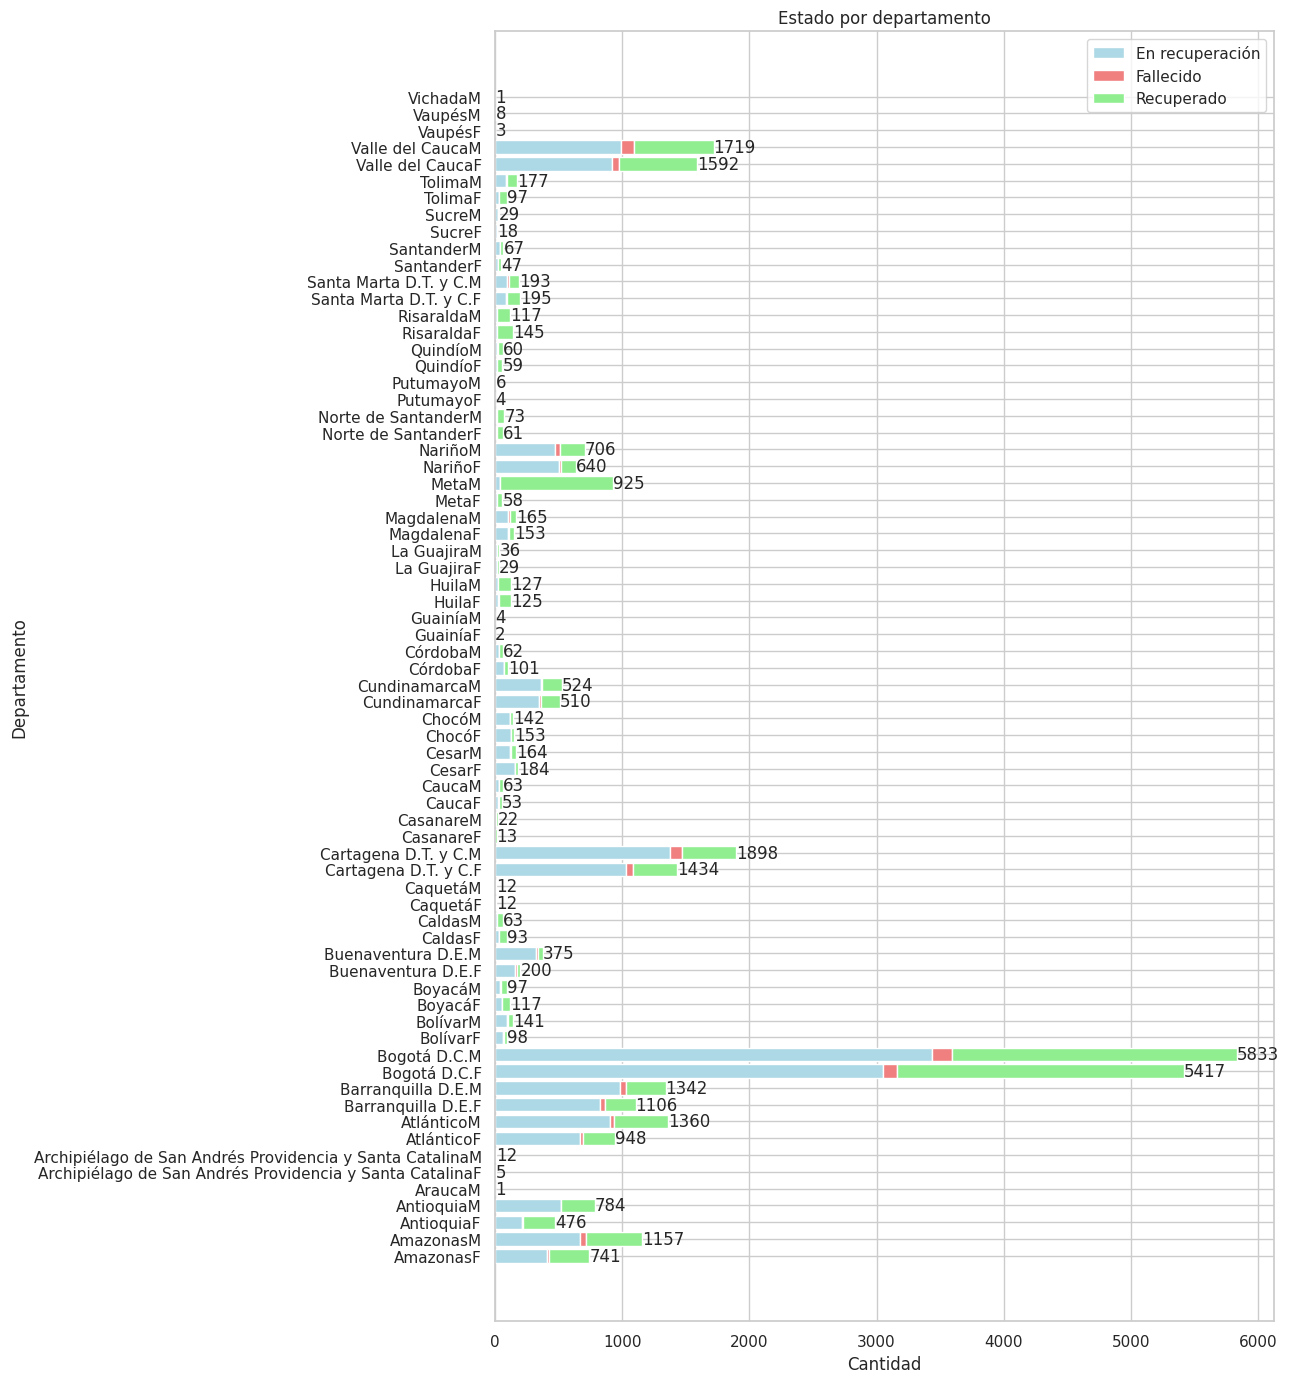

In [142]:
# Calcular el número de contagios, fallecidos, recuperados, hombres y mujeres por departamento
resultados = df2.groupby(['Departamento', 'Sexo', 'aux']).size().unstack(fill_value=0).reset_index()

print(resultados)

plt.figure(figsize=(13, 14))
index = range(len(resultados))

plt.barh(index, resultados['En recuperacion'], label='En recuperación', color='lightblue')
plt.barh(index, resultados['Fallecido'], left=resultados['En recuperacion'], label='Fallecido', color='lightcoral')
plt.barh(index, resultados['Recuperado'], left=resultados['En recuperacion'] + resultados['Fallecido'], label='Recuperado', color='lightgreen')

plt.ylabel('Departamento')
plt.xlabel('Cantidad')
plt.title('Estado por departamento')
plt.yticks(index, resultados['Departamento'] + resultados['Sexo'])
plt.legend()

# Agregar el valor de cada barra al lado de ella
for i, value in enumerate(index):
    en_recuperacion = resultados['En recuperacion'][i]
    fallecido = resultados['Fallecido'][i]
    recuperado = resultados['Recuperado'][i]
    total = en_recuperacion + fallecido + recuperado
    plt.text(total, value, str(total), ha='left', va='center')


plt.tight_layout()
plt.show()

#Ejercicio 4

*  Cifrado por Cesar y luego usarlo como clave en Vigenere

In [148]:
def cifrado_cesar(texto, desplazamiento):
    texto_cifrado = ""
    for char in texto:
        if char.isalpha():
            # Obtener el código ASCII del carácter
            codigo = ord(char)
            # Determinar si es mayúscula o minúscula
            if char.isupper():
                base = ord('A')
            else:
                base = ord('a')
            # Aplicar el desplazamiento y asegurarse de que el resultado esté en el rango de letras
            codigo = (codigo - base + desplazamiento - 1) % 26 + base
            # Convertir el código ASCII nuevamente a un carácter y agregarlo al texto cifrado
            texto_cifrado += chr(codigo)
        else:
            # Si no es una letra, agregar el carácter tal como está al texto cifrado
            texto_cifrado += char
    return texto_cifrado

In [160]:
def cifrado_vigenere(texto, clave):
    texto_cifrado = ""
    for i, char in enumerate(texto):
        if char.isalpha():
            # Obtener el desplazamiento de la clave según la posición en el texto
            desplazamiento = ord(clave[i % len(clave)].upper()) - ord('A') + 1
            # Aplicar el cifrado César usando el desplazamiento obtenido de la clave
            texto_cifrado += cifrado_cesar(char, desplazamiento)
        else:
            # Si no es una letra, agregar el carácter tal como está al texto cifrado
            texto_cifrado += char
    return texto_cifrado

In [155]:
def solicitar_datos():
    texto = input("Ingrese el texto a cifrar: ")
    return texto

In [161]:
texto = solicitar_datos()
texto_cifrado_cesar = cifrado_cesar(texto, 3)  # Cifrado César con desplazamiento de 3
texto_cifrado_vigenere = cifrado_vigenere(texto, texto_cifrado_cesar)
print("Texto cifrado con César:", texto_cifrado_cesar)
print("Texto cifrado con Vigenère:", texto_cifrado_vigenere)

Ingrese el texto a cifrar: casa
Texto cifrado con César: ecuc
Texto cifrado con Vigenère: gcmc
